# CAP - 379
# Breadth First Search Algorithm

# Creating Graphs Using `networkx` Library
## Use the following command to install `networkx` library
```python
pip install networkx
```


### 1. Graph Representation:
- The graph is created using **NetworkX**, a library for handling graphs in Python.
- **Nodes**: Represent entities (e.g., A, B, C).
- **Edges**: Represent directed connections between nodes (e.g., A → B).

### 2. Creating and Adding Edges:
- `nx.DiGraph()` creates a directed graph.
- `G.add_edges_from(edges)` adds connections between nodes.

### 3. Drawing the Graph:
- `plt.figure(figsize=(6,4))` sets the canvas size.
- `nx.spring_layout(G)`: Arranges nodes automatically.
- `nx.draw(G, pos, with_labels=True)`: Draws the graph with:
  - Node labels (A, B, etc.).
  - Light blue **nodes** and gray **edges**.
- `plt.title(title)`: Adds a title to the graph.
- `plt.show()`: Displays the graph.

### 4. Example Graph:
#### Nodes:
- A, B, C, D, E, F

#### Edges:
- A → B, A → C
- B → D, B → E
- C → F
- D → C
- E → F

### 5. Function Call:
- `draw_graph(edges, nodes, "Graph: Breadth First Search")`
  - Draws the graph with the defined nodes and edges.


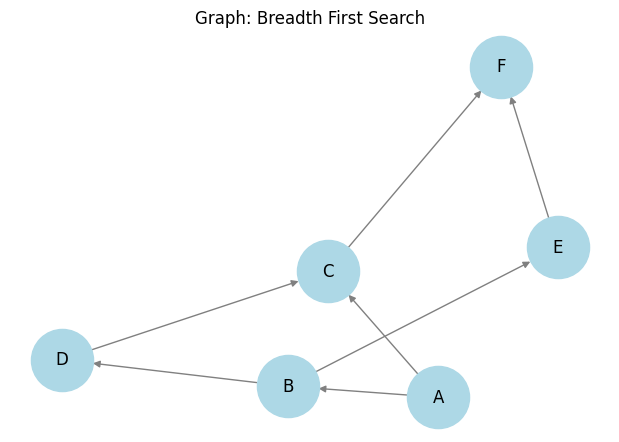

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to draw the graph
def draw_graph(edges, nodes, title):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    labels = {(u, v) for u, v in edges}
    plt.title(title)
    plt.show()

edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('D', 'C'), ('E', 'F')]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
draw_graph(edges, nodes, "Graph: Breadth First Search")

## Explanation of the BFS Algorithm Code

### 1. What is BFS?
- **Breadth-First Search (BFS)** is a graph traversal algorithm that explores all nodes **level by level**.
- It uses a **queue (FIFO)** to keep track of the next nodes to visit.

### 2. How the Code Works:
#### Step 1: Initialize BFS
- `visited = set()`: A set to keep track of visited nodes.
- `queue = deque([start])`: A queue to process nodes in the correct order.
- Mark the `start` node as visited.

#### Step 2: Traversal Process
- While `queue` is not empty:
  1. Remove the first node (`vertex`) from the queue.
  2. Print the node (showing traversal order).
  3. If `vertex == goal`, print `"Goal reached"` and **stop**.
  4. Otherwise, check all **neighboring nodes**:
     - If a neighbor is **not visited**, add it to `queue` and mark it **visited**.

### 3. Graph Definition:
- The graph is represented as an **adjacency list** (dictionary).
- Example:
  ```python
  graph = {
      'A': ['B', 'C'],
      'B': ['D', 'E'],
      'C': ['F'],
      'D': ['C'],
      'E': ['F']
  }


In [4]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")

        if vertex == goal:
            print("\nGoal reached:", goal)
            return

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['C'],
    'E': ['F']
}

print("BFS Traversal:")
bfs(graph, 'A', 'F')  

BFS Traversal:
A B C D E F 
Goal reached: F


## Practice Exercise 
## Now create the Digraph from the following Nodes using `networkx` Library

``` python
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['B', 'G'],
    'E': ['B'],
    'F': ['H'],
    'G': ['H'],
    'H': ['G'],
    'I':['G']
}
```

# **Comparison of BFS Graph Representations: Unweighted vs. Weighted**

## **1. Key Differences**
| Feature | Previous BFS Graph | Current Weighted Graph |
|---------|-----------------|------------------|
| **Edge Type** | **Unweighted** (simple connections) | **Weighted** (edges have numerical values) |
| **Graph Type** | **Directed Graph (`nx.DiGraph()`)** | **Still a Directed Graph (`nx.DiGraph()`), but with weights** |
| **Edge Addition** | `G.add_edges_from(edges)` | `G.add_weighted_edges_from(edges)` |
| **Visualization** | Nodes and edges only | Adds **edge labels** to show weights |
| **Use Case** | Used in **basic BFS traversal** | Useful for **shortest-path algorithms** (e.g., Dijkstra’s Algorithm) |

## **2. Code Enhancements**
### **Adding Weights to the Graph**
- The previous version had **no edge weights**, treating all edges as equal.
- Now, edges have **weights**, impacting traversal strategies.

### **Visualizing Edge Weights**
- In the previous BFS graph, edges were drawn **without numerical labels**.
- Now, edge weights are **explicitly displayed** using:
  ```python
  labels = {(u, v): d for u, v, d in edges}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)


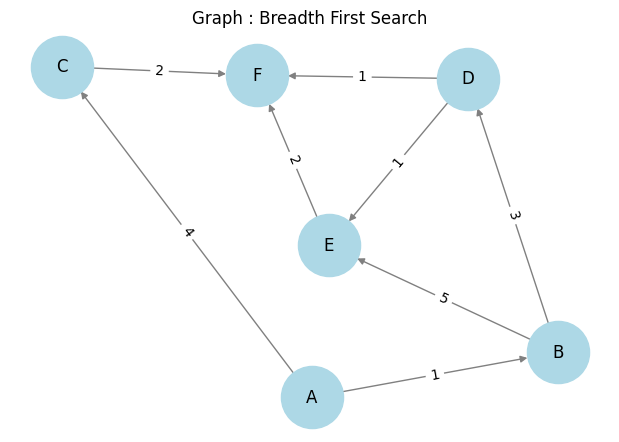

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to draw the graph
def draw_graph(edges, nodes, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    labels = {(u, v):d for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.title(title)
    plt.show()


edges= [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 3), ('B', 'E', 5),
           ('C', 'F', 2), ('D', 'F', 1), ('D', 'E', 1), ('E', 'F', 2)]
nodes= ['A', 'B', 'C', 'D', 'E', 'F']
draw_graph(edges, nodes, "Graph : Breadth First Search")

# **Dijkstra’s Algorithm: Finding the Shortest Path**

## **1. Key Differences Between BFS and Dijkstra's Algorithm**
| Feature | BFS | Dijkstra’s Algorithm |
|---------|-----|------------------|
| **Edge Weights** | **Ignored** (assumes equal edge cost) | **Uses weights** to find optimal path |
| **Use Case** | Best for **unweighted graphs** | Best for **weighted graphs** |
| **Data Structure** | **Queue (FIFO)** | **Priority Queue (Min-Heap)** |
| **Goal** | Finds shortest **number of edges** | Finds shortest **weighted path** |

## **2. How Dijkstra’s Algorithm Works**
### **Step 1: Initialization**
- **Set all distances to `∞`**, except the **start node** (`0`).
- **Use a Min-Heap** to always expand the node with the **smallest cost**.

### **Step 2: Expand Nodes**
- **Dequeue the node with the smallest known cost**.
- If it is the **goal node**, reconstruct the path.
- Otherwise, update neighbors **if a shorter path is found**.

### **Step 3: Update Priority Queue**
- If a **cheaper path** to a neighbor is found, **update** its cost and **push it into the priority queue**.
- Repeat until all reachable nodes are visited.

## **3. Example Graph**


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Function to perform Dijkstra's algorithm and return the shortest path
def dijkstra(graph, start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start))  # (cost, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = previous_nodes[current_node]
            path.reverse()
            return path, distances[goal]  # Return shortest path and cost

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return [], float('inf')  # No path found

Shortest Path: A -> B -> D -> F with cost: 5


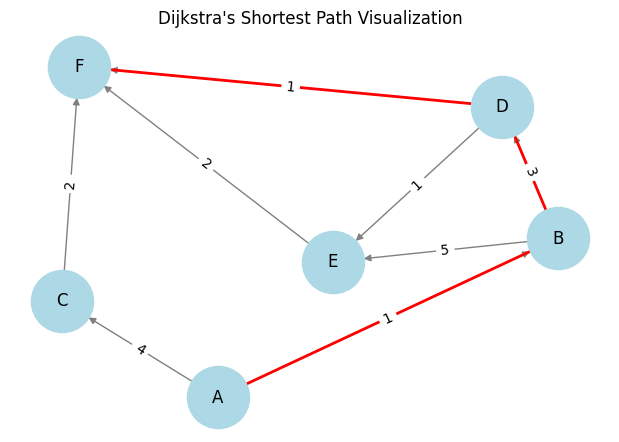

In [ ]:
# Function to draw the graph and highlight the shortest path
def draw_dijkstra_graph(edges, path, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)

    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization

    # Draw all edges in gray
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    
    # Highlight the shortest path in red
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    
    # Draw edge labels (weights)
    labels = {(u, v): d for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

    plt.title(title)
    plt.show()

# Define the weighted graph
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 3, 'E': 5},
    'C': {'F': 2},
    'D': {'F': 1, 'E': 1},
    'E': {'F': 2},
    'F': {}
}

edges = [('A', 'B', 1), ('A', 'C', 4), ('B', 'D', 3), ('B', 'E', 5),
         ('C', 'F', 2), ('D', 'F', 1), ('D', 'E', 1), ('E', 'F', 2)]

# Run Dijkstra's algorithm
shortest_path, cost = dijkstra(graph, 'A', 'F')
print("Shortest Path:", " -> ".join(shortest_path), "with cost:", cost)

# Visualize the graph with the shortest path highlighted
draw_dijkstra_graph(edges, shortest_path, "Dijkstra's Shortest Path Visualization")

## Practice Exercise 
## Now create the Weighted Digraph as shown below using `networkx` Library

![Weighted Digraph](images/BFS.jpg)
